In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

IMAGE_SIZE = (227, 227)
BATCH_SIZE = 32
NUM_CLASSES = 2 
train_path = '/home/bubbles/Quantbit Internship/train'
validation_path = '/home/bubbles/Quantbit Internship/test'

# Preprocessing and Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
model = Sequential()

# Convolutional layers
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                        

1/1 [==============================] - 0s 56ms/step


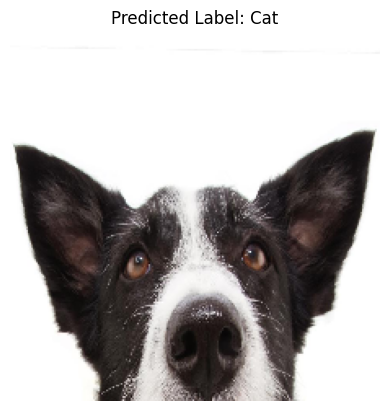

In [16]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to your dataset directory containing 'cats' and 'dogs' subdirectories
dataset_path = '/home/bubbles/Quantbit Internship/test'

# Function to preprocess an image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(227, 227))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# List all image files in the dataset directory
cat_images = os.listdir(os.path.join(dataset_path, 'cats'))
dog_images = os.listdir(os.path.join(dataset_path, 'dogs'))

# Randomly select a cat or dog image
random_cat_image = random.choice(cat_images)
random_dog_image = random.choice(dog_images)

# Select the complete path to the random image
random_cat_image_path = os.path.join(dataset_path, 'cats', random_cat_image)
random_dog_image_path = os.path.join(dataset_path, 'dogs', random_dog_image)

# Choose which image to use for prediction
random_image_path = random_cat_image_path if random.randint(0, 1) == 0 else random_dog_image_path

# Preprocess the image
preprocessed_image = preprocess_image(random_image_path)

# Make a prediction
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions)

# Map the class index to the class label (0 for cats, 1 for dogs)
class_labels = {0: 'Cat', 1: 'Dog'}

# Get the predicted class label
predicted_label = class_labels[predicted_class]

# Display the image
img = image.load_img(random_image_path, target_size=(227, 227))
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()


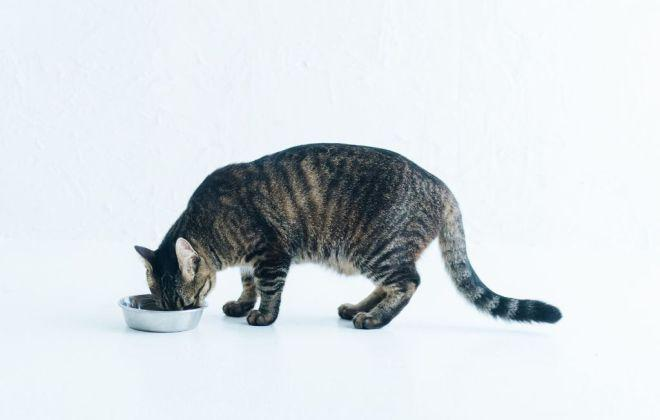

In [3]:
import torchvision
from torchvision.datasets import ImageFolder
import torch
dataset = ImageFolder('/home/bubbles/Quantbit Internship/train')
dataset.classes
from IPython.display import display

display(dataset[200][0])


In [2]:
pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
len(dataset)
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.Resize((255,255) ),
                                transforms.RandomVerticalFlip(),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()])
train_dataset = ImageFolder('/home/bubbles/Quantbit Internship/train', transform = transform)
train_dataset[0][0].shape
torch.mean(train_dataset[0][0],dim = (1,2))
torch.concat((train_dataset[0][0],train_dataset[1][0]), dim = 1 ).shape


torch.Size([3, 510, 255])

In [5]:
torch_concatinated = torch.concat([data[0] for data in train_dataset], dim = 1)

In [6]:
torch_concatinated.shape



torch.Size([3, 142035, 255])

In [8]:
mean = torch.mean(torch_concatinated, dim = (1,2))
mean

tensor([0.5875, 0.5591, 0.4995])

In [9]:
std_dev =torch.std(torch_concatinated, dim = (1,2))
additional_transform = transforms.Compose([
    transforms.Normalize(mean, std_dev)
])

train_dataset.transform.transforms.append(additional_transform)
train_dataset[0][0]


tensor([[[ 0.3003,  0.2191,  0.2326,  ...,  0.1785,  0.2055,  0.0837],
         [ 0.3003,  0.2191,  0.2055,  ...,  0.1920,  0.2326,  0.1108],
         [ 0.2867,  0.2597,  0.2597,  ...,  0.1785,  0.2055,  0.1108],
         ...,
         [ 0.5980,  0.5845,  0.5980,  ...,  0.7198,  0.6792,  0.6251],
         [ 0.5710,  0.5710,  0.5845,  ...,  0.6928,  0.6657,  0.6386],
         [ 0.5304,  0.5439,  0.5710,  ...,  0.6657,  0.6657,  0.6792]],

        [[ 0.5246,  0.4427,  0.4563,  ..., -0.2262, -0.1716, -0.2944],
         [ 0.5246,  0.4427,  0.4290,  ..., -0.1989, -0.1443, -0.2671],
         [ 0.5109,  0.4836,  0.4836,  ..., -0.2125, -0.1716, -0.2671],
         ...,
         [ 0.6201,  0.6065,  0.6065,  ...,  0.8795,  0.8385,  0.7839],
         [ 0.6201,  0.6338,  0.6338,  ...,  0.8522,  0.8249,  0.7976],
         [ 0.6201,  0.6474,  0.6611,  ...,  0.8249,  0.8249,  0.8385]],

        [[ 0.6432,  0.5669,  0.5796,  ..., -0.2461, -0.2080, -0.3223],
         [ 0.6432,  0.5669,  0.5542,  ..., -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

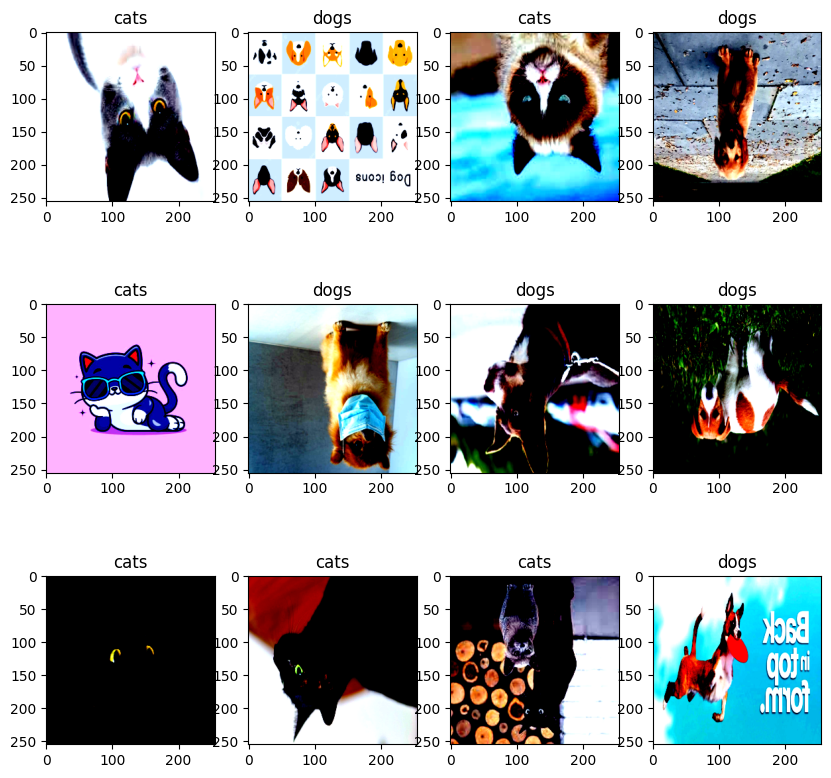

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 3
for i in range(1, columns * rows + 1):
    idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[idx]
    class_name = train_dataset.classes[label]
    fig.add_subplot(rows, columns, i)
    plt.title(class_name)
    plt.imshow(img.permute(1, 2, 0))
plt.show()

In [11]:
test_dataset = ImageFolder('/home/bubbles/Quantbit Internship/test', transform = transforms.Compose([
    transforms.Resize((255, 255)),
    transforms.ToTensor()
    ,additional_transform
]))
test_dataset

Dataset ImageFolder
    Number of datapoints: 140
    Root location: /home/bubbles/Quantbit Internship/test
    StandardTransform
Transform: Compose(
               Resize(size=(255, 255), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Compose(
               Normalize(mean=tensor([0.5875, 0.5591, 0.4995]), std=tensor([0.2898, 0.2873, 0.3087]))
           )
           )

In [15]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=2)
import torch.nn as nn
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(96),
            
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(256),
            
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(384),
            
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(384),
            
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(256)
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
model = AlexNet(2)
from tqdm import tqdm
import torch.nn.parallel as parallel
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    model = parallel.DataParallel(model)

# Move the model to the available device (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Conv2d

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr =  0.0001)
train_accuracies = []
test_accuracies = []
num_epochs = 100
for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in tqdm(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track train loss and accuracy
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate train accuracy and loss
    train_accuracy = correct_train / total_train
    train_loss = train_loss / total_train
    
    train_accuracies.append(train_accuracy)
    # Evaluation (Test)
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Track test loss and accuracy
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

    # Calculate test accuracy and loss
    test_accuracy = correct_test / total_test
    test_loss = test_loss / total_test
    
    test_accuracies.append(test_accuracy)

    # Print epoch results
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Train Acc: {train_accuracy:.4f} - Test Loss: {test_loss:.4f} - Test Acc: {test_accuracy:.4f}")


100%|█████████████████████████████████████████| 140/140 [01:24<00:00,  1.66it/s]


Epoch 1/100 - Train Loss: 0.6966 - Train Acc: 0.4794 - Test Loss: 0.6930 - Test Acc: 0.5286


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.69it/s]


Epoch 2/100 - Train Loss: 0.6984 - Train Acc: 0.5045 - Test Loss: 0.6906 - Test Acc: 0.5071


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.70it/s]


Epoch 3/100 - Train Loss: 0.6867 - Train Acc: 0.5278 - Test Loss: 0.6859 - Test Acc: 0.5786


100%|█████████████████████████████████████████| 140/140 [01:23<00:00,  1.67it/s]


Epoch 4/100 - Train Loss: 0.6812 - Train Acc: 0.5637 - Test Loss: 0.6846 - Test Acc: 0.6000


100%|█████████████████████████████████████████| 140/140 [01:23<00:00,  1.68it/s]


Epoch 5/100 - Train Loss: 0.6736 - Train Acc: 0.5889 - Test Loss: 0.6820 - Test Acc: 0.5357


100%|█████████████████████████████████████████| 140/140 [01:23<00:00,  1.68it/s]


Epoch 6/100 - Train Loss: 0.6696 - Train Acc: 0.6284 - Test Loss: 0.6800 - Test Acc: 0.5643


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.69it/s]


Epoch 7/100 - Train Loss: 0.6748 - Train Acc: 0.6140 - Test Loss: 0.6787 - Test Acc: 0.5357


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.70it/s]


Epoch 8/100 - Train Loss: 0.6733 - Train Acc: 0.6014 - Test Loss: 0.6773 - Test Acc: 0.5571


100%|█████████████████████████████████████████| 140/140 [01:23<00:00,  1.67it/s]


Epoch 9/100 - Train Loss: 0.6655 - Train Acc: 0.5996 - Test Loss: 0.6756 - Test Acc: 0.5714


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.69it/s]


Epoch 10/100 - Train Loss: 0.6649 - Train Acc: 0.6086 - Test Loss: 0.6762 - Test Acc: 0.5643


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.69it/s]


Epoch 11/100 - Train Loss: 0.6654 - Train Acc: 0.6122 - Test Loss: 0.6770 - Test Acc: 0.5643


100%|█████████████████████████████████████████| 140/140 [01:23<00:00,  1.68it/s]


Epoch 12/100 - Train Loss: 0.6540 - Train Acc: 0.6266 - Test Loss: 0.6776 - Test Acc: 0.5571


100%|█████████████████████████████████████████| 140/140 [01:24<00:00,  1.65it/s]


Epoch 13/100 - Train Loss: 0.6560 - Train Acc: 0.6176 - Test Loss: 0.6730 - Test Acc: 0.5714


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.70it/s]


Epoch 14/100 - Train Loss: 0.6591 - Train Acc: 0.6194 - Test Loss: 0.6722 - Test Acc: 0.5714


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.69it/s]


Epoch 15/100 - Train Loss: 0.6532 - Train Acc: 0.6463 - Test Loss: 0.6710 - Test Acc: 0.5429


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.70it/s]


Epoch 16/100 - Train Loss: 0.6424 - Train Acc: 0.6535 - Test Loss: 0.6757 - Test Acc: 0.5357


100%|█████████████████████████████████████████| 140/140 [01:24<00:00,  1.66it/s]


Epoch 17/100 - Train Loss: 0.6502 - Train Acc: 0.6284 - Test Loss: 0.6716 - Test Acc: 0.6286


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.70it/s]


Epoch 18/100 - Train Loss: 0.6392 - Train Acc: 0.6840 - Test Loss: 0.6733 - Test Acc: 0.6000


100%|█████████████████████████████████████████| 140/140 [01:23<00:00,  1.67it/s]


Epoch 19/100 - Train Loss: 0.6379 - Train Acc: 0.6553 - Test Loss: 0.6671 - Test Acc: 0.6214


100%|█████████████████████████████████████████| 140/140 [01:23<00:00,  1.67it/s]


Epoch 20/100 - Train Loss: 0.6337 - Train Acc: 0.6697 - Test Loss: 0.6734 - Test Acc: 0.5929


100%|█████████████████████████████████████████| 140/140 [01:23<00:00,  1.68it/s]


Epoch 21/100 - Train Loss: 0.6372 - Train Acc: 0.6571 - Test Loss: 0.6685 - Test Acc: 0.5714


100%|█████████████████████████████████████████| 140/140 [01:23<00:00,  1.68it/s]


Epoch 22/100 - Train Loss: 0.6243 - Train Acc: 0.6750 - Test Loss: 0.6718 - Test Acc: 0.5929


100%|█████████████████████████████████████████| 140/140 [01:24<00:00,  1.67it/s]


Epoch 23/100 - Train Loss: 0.6250 - Train Acc: 0.6715 - Test Loss: 0.6646 - Test Acc: 0.6357


100%|█████████████████████████████████████████| 140/140 [01:23<00:00,  1.68it/s]


Epoch 24/100 - Train Loss: 0.6132 - Train Acc: 0.6804 - Test Loss: 0.6684 - Test Acc: 0.6286


100%|█████████████████████████████████████████| 140/140 [01:23<00:00,  1.69it/s]


Epoch 25/100 - Train Loss: 0.6188 - Train Acc: 0.6804 - Test Loss: 0.6720 - Test Acc: 0.5929


100%|█████████████████████████████████████████| 140/140 [01:23<00:00,  1.68it/s]


Epoch 26/100 - Train Loss: 0.6178 - Train Acc: 0.6517 - Test Loss: 0.6723 - Test Acc: 0.6571


100%|█████████████████████████████████████████| 140/140 [01:25<00:00,  1.63it/s]


Epoch 27/100 - Train Loss: 0.6342 - Train Acc: 0.6427 - Test Loss: 0.6633 - Test Acc: 0.6143


100%|█████████████████████████████████████████| 140/140 [01:25<00:00,  1.64it/s]


Epoch 28/100 - Train Loss: 0.6099 - Train Acc: 0.6750 - Test Loss: 0.6636 - Test Acc: 0.6143


100%|█████████████████████████████████████████| 140/140 [01:28<00:00,  1.58it/s]


Epoch 29/100 - Train Loss: 0.6240 - Train Acc: 0.6966 - Test Loss: 0.6604 - Test Acc: 0.6214


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.73it/s]


Epoch 30/100 - Train Loss: 0.6167 - Train Acc: 0.6715 - Test Loss: 0.6666 - Test Acc: 0.6143


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.75it/s]


Epoch 31/100 - Train Loss: 0.6198 - Train Acc: 0.6643 - Test Loss: 0.6675 - Test Acc: 0.5929


100%|█████████████████████████████████████████| 140/140 [01:19<00:00,  1.75it/s]


Epoch 32/100 - Train Loss: 0.6119 - Train Acc: 0.6894 - Test Loss: 0.6599 - Test Acc: 0.6143


100%|█████████████████████████████████████████| 140/140 [01:19<00:00,  1.75it/s]


Epoch 33/100 - Train Loss: 0.5974 - Train Acc: 0.7235 - Test Loss: 0.6578 - Test Acc: 0.6286


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.73it/s]


Epoch 34/100 - Train Loss: 0.5954 - Train Acc: 0.7110 - Test Loss: 0.6618 - Test Acc: 0.6357


100%|█████████████████████████████████████████| 140/140 [01:19<00:00,  1.76it/s]


Epoch 35/100 - Train Loss: 0.6020 - Train Acc: 0.6930 - Test Loss: 0.6699 - Test Acc: 0.6429


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.75it/s]


Epoch 36/100 - Train Loss: 0.6070 - Train Acc: 0.6894 - Test Loss: 0.6611 - Test Acc: 0.5929


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.74it/s]


Epoch 37/100 - Train Loss: 0.5966 - Train Acc: 0.6930 - Test Loss: 0.6691 - Test Acc: 0.6143


100%|█████████████████████████████████████████| 140/140 [01:19<00:00,  1.76it/s]


Epoch 38/100 - Train Loss: 0.5812 - Train Acc: 0.7163 - Test Loss: 0.6631 - Test Acc: 0.6357


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.75it/s]


Epoch 39/100 - Train Loss: 0.5765 - Train Acc: 0.7289 - Test Loss: 0.6697 - Test Acc: 0.6429


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.74it/s]


Epoch 40/100 - Train Loss: 0.5915 - Train Acc: 0.7020 - Test Loss: 0.6594 - Test Acc: 0.6429


100%|█████████████████████████████████████████| 140/140 [01:19<00:00,  1.77it/s]


Epoch 41/100 - Train Loss: 0.5657 - Train Acc: 0.7253 - Test Loss: 0.6513 - Test Acc: 0.6357


100%|█████████████████████████████████████████| 140/140 [01:19<00:00,  1.77it/s]


Epoch 42/100 - Train Loss: 0.5823 - Train Acc: 0.6930 - Test Loss: 0.6515 - Test Acc: 0.6429


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.74it/s]


Epoch 43/100 - Train Loss: 0.5681 - Train Acc: 0.7235 - Test Loss: 0.6619 - Test Acc: 0.6429


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.74it/s]


Epoch 44/100 - Train Loss: 0.5587 - Train Acc: 0.7361 - Test Loss: 0.6538 - Test Acc: 0.6429


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.74it/s]


Epoch 45/100 - Train Loss: 0.5651 - Train Acc: 0.7325 - Test Loss: 0.6606 - Test Acc: 0.6357


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.75it/s]


Epoch 46/100 - Train Loss: 0.5533 - Train Acc: 0.7469 - Test Loss: 0.6577 - Test Acc: 0.6429


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.74it/s]


Epoch 47/100 - Train Loss: 0.5574 - Train Acc: 0.7181 - Test Loss: 0.6525 - Test Acc: 0.6429


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.71it/s]


Epoch 48/100 - Train Loss: 0.5570 - Train Acc: 0.7271 - Test Loss: 0.6444 - Test Acc: 0.6214


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.70it/s]


Epoch 49/100 - Train Loss: 0.5631 - Train Acc: 0.7181 - Test Loss: 0.6443 - Test Acc: 0.6571


100%|█████████████████████████████████████████| 140/140 [01:36<00:00,  1.46it/s]


Epoch 50/100 - Train Loss: 0.5571 - Train Acc: 0.7253 - Test Loss: 0.6362 - Test Acc: 0.6571


100%|█████████████████████████████████████████| 140/140 [01:59<00:00,  1.17it/s]


Epoch 51/100 - Train Loss: 0.5539 - Train Acc: 0.7289 - Test Loss: 0.6428 - Test Acc: 0.6500


100%|█████████████████████████████████████████| 140/140 [02:00<00:00,  1.16it/s]


Epoch 52/100 - Train Loss: 0.5593 - Train Acc: 0.7199 - Test Loss: 0.6570 - Test Acc: 0.6500


100%|█████████████████████████████████████████| 140/140 [01:57<00:00,  1.19it/s]


Epoch 53/100 - Train Loss: 0.5561 - Train Acc: 0.7145 - Test Loss: 0.6424 - Test Acc: 0.6714


100%|█████████████████████████████████████████| 140/140 [01:57<00:00,  1.19it/s]


Epoch 54/100 - Train Loss: 0.5477 - Train Acc: 0.7307 - Test Loss: 0.6351 - Test Acc: 0.6786


100%|█████████████████████████████████████████| 140/140 [01:58<00:00,  1.18it/s]


Epoch 55/100 - Train Loss: 0.5337 - Train Acc: 0.7289 - Test Loss: 0.6330 - Test Acc: 0.6143


100%|█████████████████████████████████████████| 140/140 [01:59<00:00,  1.17it/s]


Epoch 56/100 - Train Loss: 0.5402 - Train Acc: 0.7289 - Test Loss: 0.6503 - Test Acc: 0.6786


100%|█████████████████████████████████████████| 140/140 [02:07<00:00,  1.10it/s]


Epoch 57/100 - Train Loss: 0.5207 - Train Acc: 0.7648 - Test Loss: 0.6549 - Test Acc: 0.6643


100%|█████████████████████████████████████████| 140/140 [01:58<00:00,  1.18it/s]


Epoch 58/100 - Train Loss: 0.5198 - Train Acc: 0.7612 - Test Loss: 0.6242 - Test Acc: 0.6857


100%|█████████████████████████████████████████| 140/140 [02:03<00:00,  1.13it/s]


Epoch 59/100 - Train Loss: 0.5224 - Train Acc: 0.7846 - Test Loss: 0.6260 - Test Acc: 0.6357


100%|█████████████████████████████████████████| 140/140 [02:02<00:00,  1.14it/s]


Epoch 60/100 - Train Loss: 0.5226 - Train Acc: 0.7522 - Test Loss: 0.6317 - Test Acc: 0.6786


100%|█████████████████████████████████████████| 140/140 [02:01<00:00,  1.15it/s]


Epoch 61/100 - Train Loss: 0.5219 - Train Acc: 0.7558 - Test Loss: 0.6303 - Test Acc: 0.6857


100%|█████████████████████████████████████████| 140/140 [01:32<00:00,  1.52it/s]


Epoch 62/100 - Train Loss: 0.5117 - Train Acc: 0.7289 - Test Loss: 0.6265 - Test Acc: 0.6857


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.71it/s]


Epoch 63/100 - Train Loss: 0.5063 - Train Acc: 0.7792 - Test Loss: 0.6301 - Test Acc: 0.6857


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.70it/s]


Epoch 64/100 - Train Loss: 0.5272 - Train Acc: 0.7343 - Test Loss: 0.6254 - Test Acc: 0.6643


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.73it/s]


Epoch 65/100 - Train Loss: 0.5050 - Train Acc: 0.7702 - Test Loss: 0.6090 - Test Acc: 0.6714


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.73it/s]


Epoch 66/100 - Train Loss: 0.4895 - Train Acc: 0.7756 - Test Loss: 0.6206 - Test Acc: 0.7000


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.73it/s]


Epoch 67/100 - Train Loss: 0.5127 - Train Acc: 0.7540 - Test Loss: 0.6259 - Test Acc: 0.6571


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.71it/s]


Epoch 68/100 - Train Loss: 0.4933 - Train Acc: 0.7810 - Test Loss: 0.6121 - Test Acc: 0.7000


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.72it/s]


Epoch 69/100 - Train Loss: 0.5034 - Train Acc: 0.7864 - Test Loss: 0.6121 - Test Acc: 0.6786


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.73it/s]


Epoch 70/100 - Train Loss: 0.4806 - Train Acc: 0.7576 - Test Loss: 0.6176 - Test Acc: 0.6714


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.73it/s]


Epoch 71/100 - Train Loss: 0.4693 - Train Acc: 0.7935 - Test Loss: 0.6375 - Test Acc: 0.6929


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.73it/s]


Epoch 72/100 - Train Loss: 0.4760 - Train Acc: 0.7917 - Test Loss: 0.6141 - Test Acc: 0.6714


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.73it/s]


Epoch 73/100 - Train Loss: 0.4832 - Train Acc: 0.7774 - Test Loss: 0.6364 - Test Acc: 0.7000


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.73it/s]


Epoch 74/100 - Train Loss: 0.4639 - Train Acc: 0.7810 - Test Loss: 0.6547 - Test Acc: 0.6786


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.73it/s]


Epoch 75/100 - Train Loss: 0.4948 - Train Acc: 0.7756 - Test Loss: 0.6376 - Test Acc: 0.6643


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.73it/s]


Epoch 76/100 - Train Loss: 0.4476 - Train Acc: 0.8115 - Test Loss: 0.6249 - Test Acc: 0.6643


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.73it/s]


Epoch 77/100 - Train Loss: 0.4734 - Train Acc: 0.7756 - Test Loss: 0.6261 - Test Acc: 0.6714


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.72it/s]


Epoch 78/100 - Train Loss: 0.4656 - Train Acc: 0.7899 - Test Loss: 0.6122 - Test Acc: 0.6214


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.74it/s]


Epoch 79/100 - Train Loss: 0.4777 - Train Acc: 0.7846 - Test Loss: 0.6045 - Test Acc: 0.7000


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.73it/s]


Epoch 80/100 - Train Loss: 0.4640 - Train Acc: 0.8043 - Test Loss: 0.6063 - Test Acc: 0.6857


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.72it/s]


Epoch 81/100 - Train Loss: 0.4544 - Train Acc: 0.8115 - Test Loss: 0.6320 - Test Acc: 0.6929


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.69it/s]


Epoch 82/100 - Train Loss: 0.4493 - Train Acc: 0.8025 - Test Loss: 0.6209 - Test Acc: 0.6929


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.73it/s]


Epoch 83/100 - Train Loss: 0.4606 - Train Acc: 0.7917 - Test Loss: 0.6075 - Test Acc: 0.6714


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.73it/s]


Epoch 84/100 - Train Loss: 0.4422 - Train Acc: 0.7882 - Test Loss: 0.6205 - Test Acc: 0.6714


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.75it/s]


Epoch 85/100 - Train Loss: 0.4566 - Train Acc: 0.7953 - Test Loss: 0.5901 - Test Acc: 0.6714


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.69it/s]


Epoch 86/100 - Train Loss: 0.4333 - Train Acc: 0.8007 - Test Loss: 0.6163 - Test Acc: 0.6714


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.71it/s]


Epoch 87/100 - Train Loss: 0.4450 - Train Acc: 0.8025 - Test Loss: 0.5878 - Test Acc: 0.6714


100%|█████████████████████████████████████████| 140/140 [01:22<00:00,  1.69it/s]


Epoch 88/100 - Train Loss: 0.4379 - Train Acc: 0.8043 - Test Loss: 0.5897 - Test Acc: 0.6786


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.73it/s]


Epoch 89/100 - Train Loss: 0.4269 - Train Acc: 0.8151 - Test Loss: 0.5883 - Test Acc: 0.7000


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.73it/s]


Epoch 90/100 - Train Loss: 0.4361 - Train Acc: 0.8061 - Test Loss: 0.5836 - Test Acc: 0.6571


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.74it/s]


Epoch 91/100 - Train Loss: 0.4272 - Train Acc: 0.8043 - Test Loss: 0.5942 - Test Acc: 0.6643


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.73it/s]


Epoch 92/100 - Train Loss: 0.4283 - Train Acc: 0.8133 - Test Loss: 0.5817 - Test Acc: 0.6714


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.74it/s]


Epoch 93/100 - Train Loss: 0.4170 - Train Acc: 0.8061 - Test Loss: 0.5988 - Test Acc: 0.6929


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.73it/s]


Epoch 94/100 - Train Loss: 0.4106 - Train Acc: 0.8205 - Test Loss: 0.5937 - Test Acc: 0.6857


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.72it/s]


Epoch 95/100 - Train Loss: 0.4046 - Train Acc: 0.8330 - Test Loss: 0.6102 - Test Acc: 0.6857


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.72it/s]


Epoch 96/100 - Train Loss: 0.4039 - Train Acc: 0.8061 - Test Loss: 0.6440 - Test Acc: 0.6857


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.71it/s]


Epoch 97/100 - Train Loss: 0.4066 - Train Acc: 0.8312 - Test Loss: 0.6205 - Test Acc: 0.6714


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.72it/s]


Epoch 98/100 - Train Loss: 0.4005 - Train Acc: 0.8420 - Test Loss: 0.6461 - Test Acc: 0.6786


100%|█████████████████████████████████████████| 140/140 [01:21<00:00,  1.73it/s]


Epoch 99/100 - Train Loss: 0.3900 - Train Acc: 0.8420 - Test Loss: 0.6233 - Test Acc: 0.6571


100%|█████████████████████████████████████████| 140/140 [01:20<00:00,  1.74it/s]


Epoch 100/100 - Train Loss: 0.3938 - Train Acc: 0.8312 - Test Loss: 0.6041 - Test Acc: 0.6786


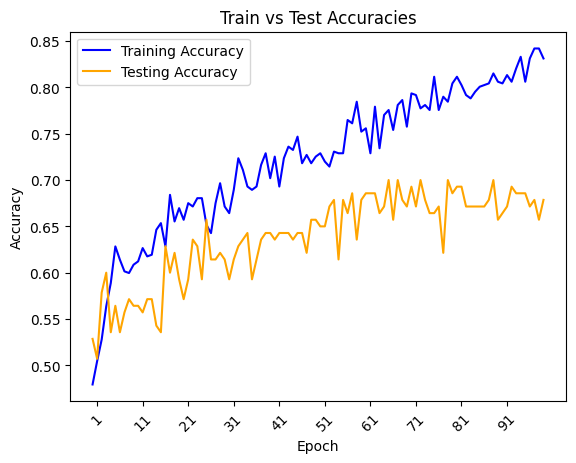

In [19]:


import seaborn as sns

sns.lineplot(x = range(100), y = train_accuracies, color = "blue", label = "Training Accuracy")
sns.lineplot(x = range(100), y = test_accuracies, color = "orange", label = "Testing Accuracy")
plt.title("Train vs Test Accuracies")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(range(1,100,10), rotation = 45)
plt.yticks(label = range(1,100,15))
plt.legend()
plt.show()



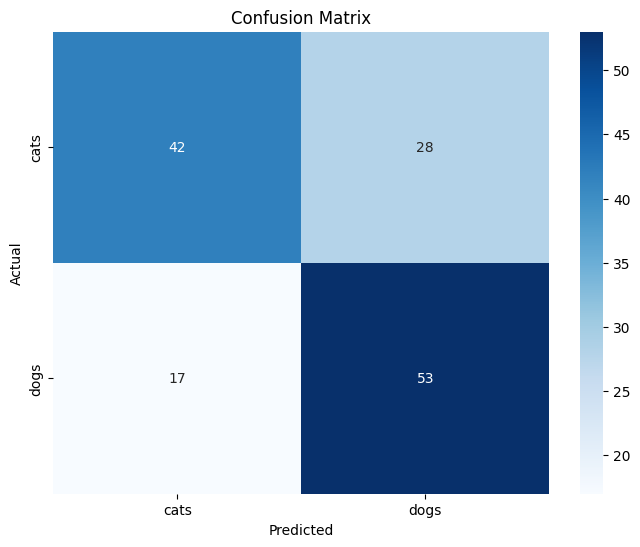

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(all_targets, all_predictions)
labels = dataset.classes
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.title('Confusion Matrix')
plt.show()

In [18]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 KB 756.2 kB/s eta 0:00:001m854.9 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
